# Trabalho Final - Ciência de Dados - Enap / 2020
## Aluno: William Lapa Santos Filho

### Apresentação do Dataset:

#### Tratam-se de base dados PÚBLICA coletada obtidas dos valores agregados por município das Declarações de Imposto de Renda da Pessoa Física (DIRPF) hospedadas no portal Grandes Números DIRPF elaborado pelo CETAD (Centro de Estudos Tributários e Aduaneiros) vinculado à Receita Federal do Brasil. Foram extraídas as informações das DIRPFs entregues por município de jurisdição dos contribuintes dos anos-calendários de 2015 a 2018.
#### Fonte: https://receita.economia.gov.br/dados/receitadata/estudos-e-tributarios-e-aduaneiros/estudos-e-estatisticas/11-08-2014-grandes-numeros-dirpf/grandes-numeros-dirpf-capa

#### Também utilizaremos a base de população, PIB e PIB per Capita por município obtida junto ao IBGE do site https://sidra.ibge.gov.br/

### Motivação Pessoal:

#### Tratam-se de informações relevantes para análise da evolução de rendimentos e bens declarados para a administração tributária federal, cujo escopo faz parte da minha atividade profissional. 

## Investigação:

### Hipóteses a serem testadas:

### 1) Os municípios com maior renda per capita (mais ricos) apresentam maiores rendimentos declarados em 2018?

### 2) Os municípios mais ricos apresentam maior rendimento declarado por qtde de declarantes em 2018?

### 3) As deduções com instrução (educação) são relacionadas com os municípios mais ricos (maiores Pib per Capita) em 2018?

### 4) Houve evolução de 215 a 2018 nos rendimentos totais declarados no modelo completo em relação aos municípios com menor Pib Per Capita?

## Importando as principais bibliotecas

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install tabulate

In [7]:
# Codigo para rodar no Colab caso necvessário.
#from google.colab import drive
#drive.mount('/content/drive/')

# Análise Informações DIRPF Agregadas


### Dataset - Importando a base de dados e realizando tratamento iniciais


In [8]:
# Importando a bse de dados da RFB
# fonte: https://receita.economia.gov.br/dados/receitadata/estudos-e-tributarios-e-aduaneiros/estudos-e-estatisticas/11-08-2014-grandes-numeros-dirpf
# concatenando os arquivos de 2015 a 2018.
# As colunas de Rendimento em diante estão em milhares.

# Importando base de população do site IBGE: https://sidra.ibge.gov.br/

# Para o Google
#decl = pd.read_csv('/content/drive/My Drive/TrabalhoFinal/dirpf2015_2018.csv')
#pop_mun = pd.read_csv('/content/drive/My Drive/TrabalhoFinal/pop_mun.csv')
#pop_uf= pd.read_csv('/content/drive/My Drive/TrabalhoFinal/pop_uf.csv')
#pib_mun= pd.read_csv('/content/drive/My Drive/TrabalhoFinal/pib_munic.csv')


decl = pd.read_csv('dirpf2015_2018.csv')
pop_mun = pd.read_csv('pop_mun.csv')
pop_uf= pd.read_csv('pop_uf.csv')
pib_mun= pd.read_csv('pib_munic.csv')

<h3 align="center"> Atributos utilizados no DataFrame </h3>
<p></p>
<img src="AtributosDataFrame.jpg">

In [10]:
# Elaborando DataFrame final contendo informações das DIRPFs, população, PIB e PIB per capita

# Cruzando dados de municípios (fonte: Receita Federal do Brasil) com pib per capita por municípios (fonte: IBGE)
df_pib = decl.merge(pib_mun, left_on='chave', right_on='chave', how='left')
df_pib = df_pib[['Qtde Declarantes', 'Instrução', 'Médicas', 'Bens e Direitos', 'ano',
       'Municipio_x', 'UF_x', 'chave', 'Total Rend',
       'Total Rend por declarante', 'Instrução por declarante',
       'Médicas por declarante', 'Bens e Direitos por declarante', 'Ano'
       , 'Código do Município', 'PIB x 1000',
       'PIB per capita x 1 ']]
df_pib.rename({'UF_x': 'UF', 'Municipio_x': 'Municipio', 'PIB per capita x 1 ':'PIB per capita x 1'},axis=1, inplace=True)
df_pib['chave_pop'] = df_pib['Municipio']+df_pib['UF']

# Cruzando dados de municípios (fonte: Receita Federal do Brasil) com População por municípios e por UF (fonte: IBGE)
df_pib = df_pib.merge(pop_mun, right_on='chave', left_on='chave_pop', how='left')
pd.options.display.float_format = '{:.2f}'.format
df_pib['ano'].astype(int)
del df_pib['UF_y']
del df_pib['chave_y']
del df_pib['chave_x']
del df_pib['Municipio_y']
del df_pib['Ano']
del df_pib['chave_pop']
df_pib.rename({'UF_x': 'UF', 'Municipio_x': 'Municipio'},axis=1, inplace=True)

# Ajustando as colunas de população a fim de mostra unica coluna de população por município e por ano:
df_pib['População'] = df_pib.apply(lambda x: x[f'Pop Mun {x.ano}'], axis=1)
df_pib.drop(['Pop Mun 2015', 'Pop Mun 2016', 'Pop Mun 2017', 'Pop Mun 2018'], axis=1, inplace=True)
df_pib['População'].astype(int, errors='ignore')

# Data Frame contendo informações de população e pib percapita
df_pib.head() 

,Qtde Declarantes,Instrução,Médicas,Bens e Direitos,ano,Municipio,UF,Total Rend,Total Rend por declarante,Instrução por declarante,Médicas por declarante,Bens e Direitos por declarante,Código do Município,PIB x 1000,PIB per capita x 1,População
0,884,544087.86,1332363.16,81259268.80,2015,ABADIA DE GOIAS,GO,46974653.07,53138.75,615.48,1507.20,91922.25,5200050.00,171701.65,21748.15,7895.00
1,572,108173.27,258484.35,75752528.36,2015,ABADIA DOS DOURADOS,MG,29753201.79,52016.09,189.11,451.90,132434.49,3100104.00,164480.42,23446.96,7015.00
2,926,776157.39,1313360.98,112458949.72,2015,ABADIANIA,GO,47339874.13,51122.97,838.18,1418.32,121445.95,5200100.00,289003.06,15994.41,18069.00
3,7246,14736743.17,22390491.54,246027102.31,2015,ABAETETUBA,PA,402850510.55,55596.26,2033.78,3090.05,33953.51,1500107.00,1192555.06,7927.59,150431.00
4,2157,883004.50,3011041.26,453803065.76,2015,ABAETE,MG,165166853.93,76572.49,409.37,1395.94,210386.22,3100203.00,339606.98,14429.87,23535.00


In [17]:
df_pib.describe()

,Qtde Declarantes,Instrução,Médicas,Bens e Direitos,ano,Total Rend,Total Rend por declarante,Instrução por declarante,Médicas por declarante,Bens e Direitos por declarante,Código do Município,PIB x 1000,PIB per capita x 1,População
count,22287.00,22287.00,22287.00,22287.00,22287.00,22287.00,22286.00,22286.00,22286.00,22286.00,22050.00,22050.00,22050.00,22042.00
mean,5155.16,3819798.90,13439689.25,1505708958.26,2016.50,510126893.89,59687.97,465.15,1280.67,128479.84,3257100.43,1165608.02,21570.12,37203.97
std,52398.30,38342652.61,191830733.86,28949281482.53,1.12,7476933378.85,20870.61,319.47,773.56,209446.86,984288.71,11521371.29,21443.50,218865.77
min,0.00,0.00,0.00,0.00,2015.00,0.00,21040.51,0.00,0.00,573.08,1100015.00,11501.40,3089.57,786.00
25%,272.00,81510.50,252030.22,16509127.15,2015.50,13984588.53,47553.54,244.16,808.00,44068.08,2512705.00,76810.80,9214.53,5469.25
50%,601.00,217895.55,688009.05,60079926.91,2016.00,33714741.82,56333.74,391.03,1173.87,104887.36,3146552.00,169641.65,16089.48,11560.00
75%,1747.00,852764.89,2434256.07,238305918.09,2017.00,110269372.32,67934.31,603.15,1621.29,179941.89,4119608.00,453034.92,26504.71,25080.75
max,3248241.00,2063372428.34,12348333267.49,2149146240806.77,2018.00,498025332808.36,975468.41,4710.42,46969.95,16014725.14,5300108.00,714683362.46,583171.85,12176866.00


## Análise exploratória dos dados

### Hipótese 1:

#### Existe uma correlação direta positiva em rendimentos totais declarados por contribuinte e o pib per capita de cada município. Iremos testar essa hipótese no gráfico abaixo:

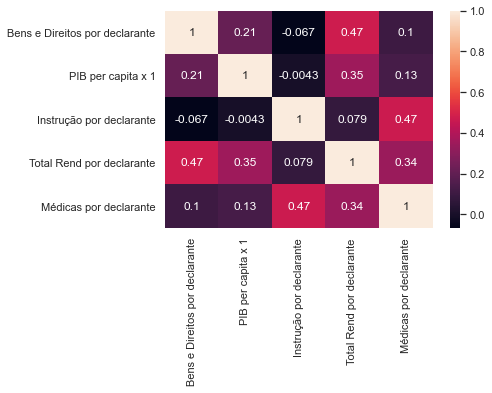

In [32]:
sns.set(style="darkgrid")
ax1 = sns.heatmap(df_pib[["Bens e Direitos por declarante", "PIB per capita x 1", "Instrução por declarante", "Total Rend por declarante", "Médicas por declarante"]].corr(), annot=True)

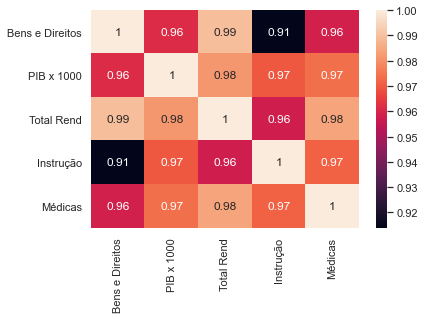

In [28]:
sns.set(style="darkgrid")
ax1 = sns.heatmap(df_pib[["Bens e Direitos", "PIB x 1000", "Total Rend", "Instrução", "Médicas"]].corr(), annot=True)

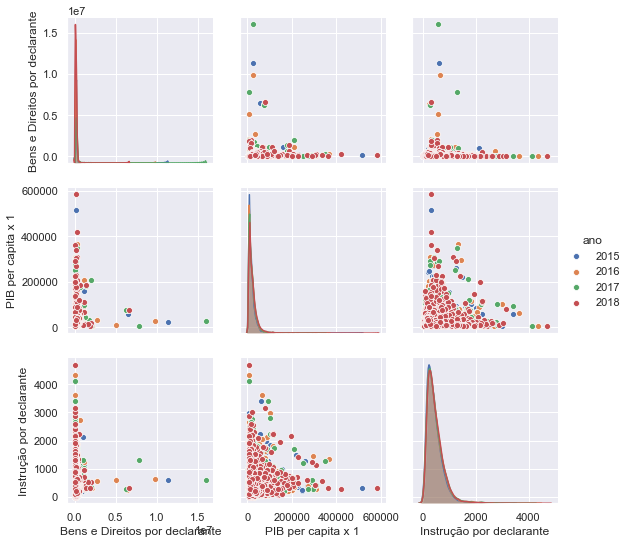

In [21]:
#fig, ax1 = plt.subplots(1, 1, figsize=(15, 6))
sns.set(style="darkgrid")
ax1= sns.pairplot(df_pib, hue="ano", x_vars=["Bens e Direitos por declarante", "PIB per capita x 1", "Instrução por declarante"],
    y_vars=["Bens e Direitos por declarante", "PIB per capita x 1", "Instrução por declarante"])

### Hipótese 2:

#### Existe uma correlação direta positiva em Bens e Direitos declarados por contribuinte e o pib per capita de cada município. Iremos testar essa hipótese no gráfico abaixo:

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 6))
sns.set(style="darkgrid")
ax1 = sns.boxplot(x='ano', y="Bens e Direitos por declarante", data=df_pib)

## Hipótese 3:

#### Há uma relação linear entre crescimento da população e quantidade de declarações enviadas a Receita Federal do Brasil. Iremos testar essa hipótese no gráfico abaixo:

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
sns.set(style="darkgrid")
ax1 = sns.countplot(y="Status", data=dataset)

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
sns.set(style="darkgrid")
ax1 = sns.countplot(y="Tipo de Representação Legal", data=dataset)

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
sns.set(style="whitegrid")
ax1 = sns.countplot(y="Motivo Alteracao Malha", data=dataset)